In [1]:
import matutil as mt
import matplotlib.pyplot as plt
import numpy as np


(a) ¿Cual debería ser el dominio de cada uno de los parámetros α; β y γ ? Explica, en términos cualitativos,
cómo sospechas tú que influye el valor de los parámetros en la evolución de la población.

Dado que tanto &alpha; como &beta; representan probabilidades, su dominio debe estar entre 0 y 1. En cuanto al dominio del parámetro &gamma;, este debe corresponder a un entero positivo. La influencia de estos parámetros se describe a continuación:

- &alpha;: Mientras más alta es la probabilidad de que los adultos sobrevivan, entonces mayor será la cantidad de crías al siguiente año (dado que la cantidad de crías al año siguiente depende tanto de &gamma; como de la cantidad de adultos que sobreviven el año anterior) y por ende mayor será el crecimiento poblacional.  
  
  
- &beta;: Analogamente a lo anterior, mientras más alta sea la cantidad de crías que sobreviven en un año n (es decir, mientras más grande es &beta;), mayor será la cantidad de adultos en el año (n + 1) y por tanto mayor será la cantidad de crías en el año (n + 2). Es decir, tiene una influencia similar al parámetro &alpha; pero su impacto en el crecimiento poblacional se ve en el trancurso de 2 años.   
  
  
- &gamma;: Mientras más alto es el valor de &gamma;, más crías tiene en promedio cada conejo adulto y por tanto más crece la poblacion (para &alpha; y &beta; dados). Además, mientras más bajo es el valor de &gamma;, entonces mayor es el riesgo de desaparación de la población (ej &gamma; = 1 ó &gamma; = 0).  
  

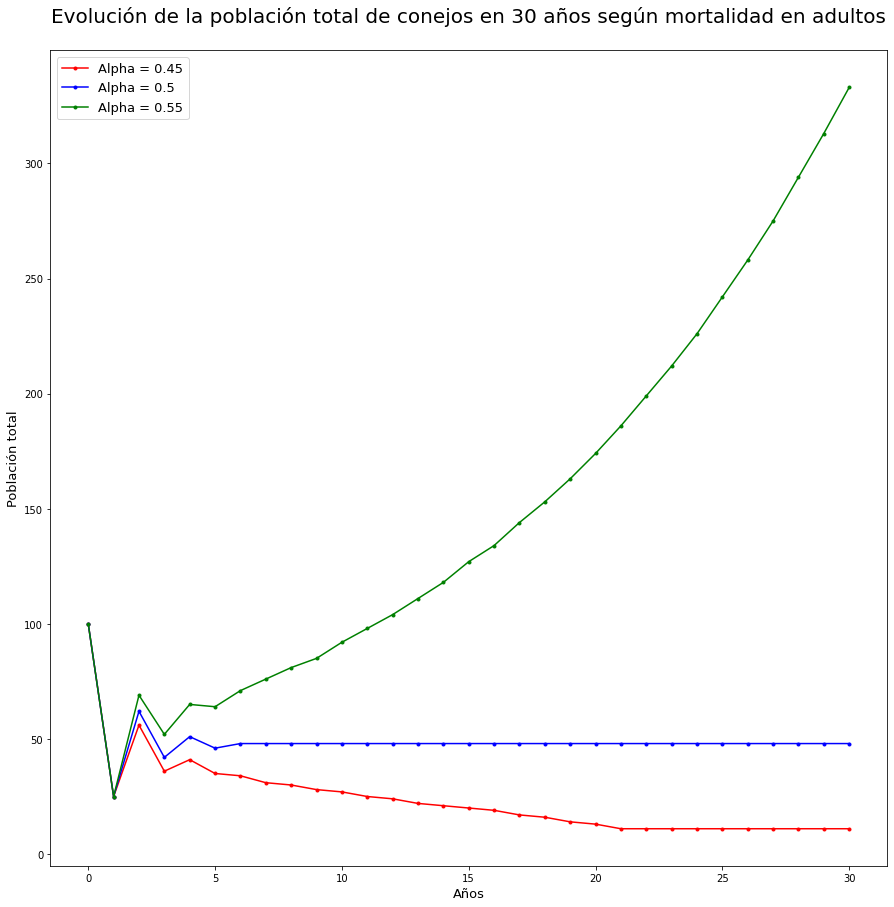

In [6]:
# (b)
#En primer lugar definimos la matriz del sistema.
#Se define inicialmente con strings que indican donde se deben ubicar los parámetros al momento de resolver el sistema.
M = mt.Mat(({1, 2}, {1, 2}), {(1, 1): 'alpha', (1, 2): 'beta', (2, 1): 'alpha * gamma'})
# Primer escenario
beta = 0.25
gamma = 4
alpha = [0.45, 0.5, 0.55]
x_0  = 0
y_0 = 100
dict_resultados = dict()
M[1, 2] = beta
#Iteración por alpha
for alp in alpha:
    #Para cada alpha se genera una lista de resultados
    lista_res = []
    #Se inicializa el vector población
    vector_poblacion = mt.Vec({1, 2}, {1: x_0, 2: y_0})
    #Inicialización de matriz
    M[1, 1] = alp
    M[2, 1] = alp * gamma
    #Se añade la población inicial
    lista_res.append((vector_poblacion[1], vector_poblacion[2]))
    #Iteración por año
    for ano in range(1, 31):    
        res = M * vector_poblacion     
        #Se aproximan los resultados a enteros (por tratarse de población)   
        vector_poblacion[1] = round(res[1], 0)
        vector_poblacion[2] = round(res[2], 0)
        lista_res.append((vector_poblacion[1], vector_poblacion[2]))
    #Guardar los resultados para cada año (población total)     
    dict_resultados[alp] = [x[0] + x[1] for x in lista_res]

#Se genera el gráfico
fig = plt.figure(figsize = (15, 15))
plt.title('Evolución de la población total de conejos en 30 años según mortalidad en adultos\n', fontsize = 20)
plt.plot(np.linspace(0, 30, 31), dict_resultados[0.45], 'r.-', label = 'Alpha = 0.45')
plt.plot(np.linspace(0, 30, 31), dict_resultados[0.5], 'b.-', label = 'Alpha = 0.5')
plt.plot(np.linspace(0, 30, 31), dict_resultados[0.55], 'g.-', label = 'Alpha = 0.55')
plt.legend(fontsize = 13)
plt.ylabel('Población total', fontsize = 13)
plt.xlabel('Años', fontsize = 13) 
plt.show()    

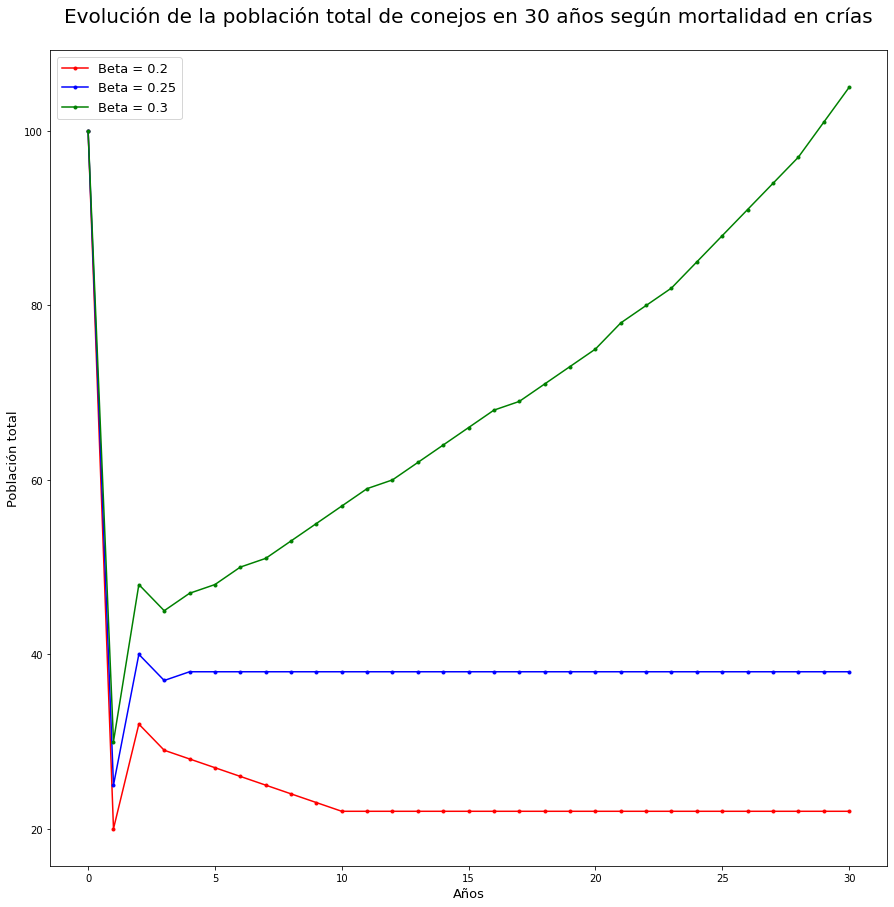

In [3]:
# (c)

# Segundo escenario
betas = [0.2, 0.25, 0.3]
gamma = 1
alpha = 0.8
x_0  = 0
y_0 = 100
dict_resultados = dict()
M[1, 1] = alpha
M[2, 1] = alpha * gamma
#Iteración por beta
for beta in betas:
    #Para cada beta se genera una lista de resultados
    lista_res = []
    #Se inicializa el vector población
    vector_poblacion = mt.Vec({1, 2}, {1: x_0, 2: y_0})
    #Inicialización de matriz
    M[1, 2] = beta
    #Se añade la población inicial
    lista_res.append((vector_poblacion[1], vector_poblacion[2]))
    #Iteración por año
    for ano in range(1, 31):    
        res = M * vector_poblacion     
        #Se aproximan los resultados a enteros (por tratarse de población)   
        vector_poblacion[1] = round(res[1], 0)
        vector_poblacion[2] = round(res[2], 0)
        lista_res.append((vector_poblacion[1], vector_poblacion[2]))
    #Guardar los resultados para cada año (población total)     
    dict_resultados[beta] = [x[0] + x[1] for x in lista_res]

#Se genera el gráfico
fig = plt.figure(figsize = (15, 15))
plt.title('Evolución de la población total de conejos en 30 años según mortalidad en crías\n', fontsize = 20)
plt.plot(np.linspace(0, 30, 31), dict_resultados[0.2], 'r.-', label = 'Beta = 0.2')
plt.plot(np.linspace(0, 30, 31), dict_resultados[0.25], 'b.-', label = 'Beta = 0.25')
plt.plot(np.linspace(0, 30, 31), dict_resultados[0.3], 'g.-', label = 'Beta = 0.3')
plt.legend(fontsize = 13)
plt.ylabel('Población total', fontsize = 13)
plt.xlabel('Años', fontsize = 13)
plt.show()     

Text(0.5, 0, 'Años')

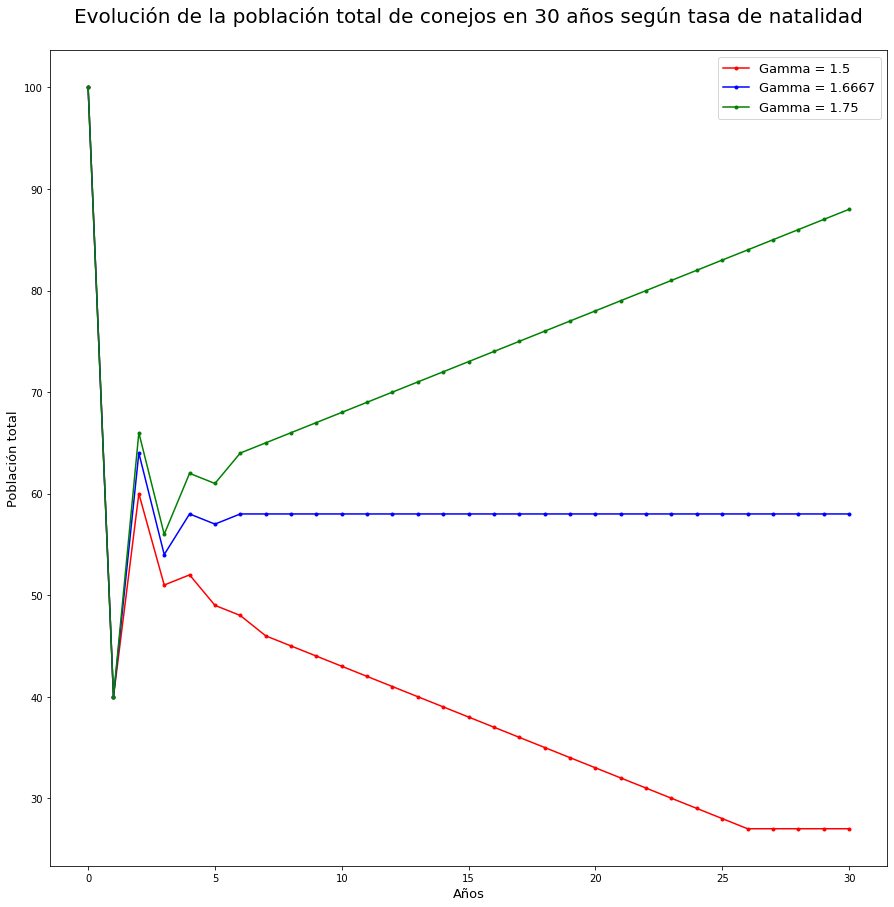

In [4]:
#(d)
# Tercer escenario
beta = 0.4
gammas = [1.5, 1.6667, 1.75]
alpha = 0.6
x_0  = 0
y_0 = 100
dict_resultados = dict()
M[1, 2] = beta
M[1, 1] = alpha
#Iteración por gamma
for gamma in gammas:
    #Para cada gamma se genera una lista de resultados
    lista_res = []
    #Se inicializa el vector población
    vector_poblacion = mt.Vec({1, 2}, {1: x_0, 2: y_0})
    #Se añade la población inicial
    lista_res.append((vector_poblacion[1], vector_poblacion[2]))
    #Inicialización de matriz
    M[2, 1] = alpha * gamma
    #Iteración por año
    for ano in range(1, 31):    
        res = M * vector_poblacion     
        #Se aproximan los resultados a enteros (por tratarse de población)   
        vector_poblacion[1] = round(res[1], 0)
        vector_poblacion[2] = round(res[2], 0)
        lista_res.append((vector_poblacion[1], vector_poblacion[2]))
    #Guardar los resultados para cada año (población total)     
    dict_resultados[gamma] = [x[0] + x[1] for x in lista_res]

#Se genera el gráfico
fig = plt.figure(figsize = (15, 15))
plt.title('Evolución de la población total de conejos en 30 años según tasa de natalidad\n', fontsize = 20)
plt.plot(np.linspace(0, 30, 31), dict_resultados[1.5], 'r.-', label = 'Gamma = 1.5')
plt.plot(np.linspace(0, 30, 31), dict_resultados[1.6667], 'b.-', label = 'Gamma = 1.6667')
plt.plot(np.linspace(0, 30, 31), dict_resultados[1.75], 'g.-', label = 'Gamma = 1.75')
plt.legend(fontsize = 13)
plt.ylabel('Población total', fontsize = 13)
plt.xlabel('Años', fontsize = 13)     